# **Sneezy defeating Google Recaptcha**






## Task

Thema: Eine interessante und lehrreiche Datenanalyse auf einem von Ihnen wählbaren Datenset

Einschränkung: Keines der "klassischen" Datensets aus scikit-learn oder Keras.
Die Arbeit soll Ihre Kompetenzen im Bereich Maschinelles Lernen demonstrieren.
Die Arbeit soll die Bereiche "Domainverständnis", "Datenvorverarbeitung", "Analyse" und "Visualisierung" abdecken.
Sie können sich an anderen Arbeiten orientieren, müssen das Gelernte dann aber auf Ihren gewählten Analysegegenstand übertragen.
Verwendete Quellen müssen im Notebook angegeben werden.
Format: Ein vollständiges und in sich abgeschlossenes Jupyter Notebook

Das vollständig ausgeführte Jupyter Notebook ist zusätzlich auch als PDF-Datei einzureichen.
Falls die analysierten Daten zu umfangreich sind um sie mitabzugeben, reicht ein Link auf das Datenset.
Gruppengröße: 4 Personen (in Sonderfällen 3 Personen)

Bearbeitungszeitraum: **16.08 - 08.09.2023**

**23.08: Einreichung einer Projektskizze** (ca. eine DIN A4-Seite): untersuchte Daten, gewählte Fragestellung, geplantes Vorgehen, Aufgabenverteilung in der Gruppe

**30.08: Abgabe eines Zwischenstands** (lauffähiges Jupyter Notebook) und eines Zwischenberichts (ca. eine DIN A4-Seite): erreichter Stand, aufgetretene Herausforderungen, begründete Abweichungen von der Projektskizze

**08.09: Abgabe der finalen Version (vollständiges Jupyter Notebook + Erklärung)**
Erklärung: Unterschriebene Eigenständigkeitserklärung + Aufschlüsselung der Arbeitsaufteilung innerhalb der Gruppe (Hauptverantwortlichkeiten für Bestandteile + individueller Beitrag in Prozent der Gesamtleistung)

Arbeitsumfang: 40 - 50 Arbeitsstunden pro Person

Bewertungskriterien laut Masterhausarbeitsvorlage:

Gliederung der Arbeit / Aufbau und Darstellung der Problemstellung / Systematik / Struktur ("roter Faden")
Wissenschaftlichkeit / Inhaltliche Vollständigkeit und Richtigkeit / Themenrelevanz / Quellenarbeit / Eigenleistung
Klarheit der Darstellung & Stringenz der Argumentationskette / formale Korrektheit / Rechtschreibung / Schreibstil
Zielpublikum: Studierende Ihres Studiengangs

Fokus: Demonstration Ihrer Kompetenzen + Wissensvermittlung (das konkrete Analyseergebnis ist nachrangig)

## Projektskizze

### Google reCAPTCHA V2


#### Hintergrund und Kontext

[Google reCAPTCHA](https://developers.google.com/recaptcha/docs/display) ist ein Sicherheitswerkzeug, das entwickelt wurde, um zwischen menschlichen Benutzern und Bots zu unterscheiden und so Missbrauch und Cyberangriffe zu verhindern. Die Version, reCAPTCHA V2, stellt Benutzern Herausforderungen wie die Identifizierung von Objekten in Bildern. Das Umgehen dieser Sicherheitsmaßnahme mittels maschinellen Lernens und tiefen neuronalen Netzen ist sowohl technisch als auch wissenschaftlich interessant, da es die Leistungsfähigkeit dieser Modelle testet und gleichzeitig zur Verbesserung der Sicherheit von CAPTCHA-Systemen beitragen kann.

#### Fragestellungen und Ziele

Zu welcher Genauigkeit können derzeit Modelle mittels Verfahren des maschinellen Lernens optimiert werden, um in der Anwendung Google’s Recaptha V2 Bilder korrekt zu klassifizieren?

- Welche Methoden zur Qualitätsverbesserung von Bilddatensätzen (z.B. Resampling, Data Augmentation) werden aktuell in der Forschung bevorzugt, und wie wirken sich diese auf das Training von CNNs aus?

- Was sind die neuesten Entwicklungen (State-of-the-Art) in der Bildverarbeitung mit maschinellem Lernen, insbesondere bei der Verwendung von tiefen neuronalen Netzen wie Inceptionv3?  

- Welche in der Forschung bestehenden Metriken zur Klassifikation eignen sich zur Lösung des oben beschriebenen Anwendungsfalls?

#### Geplantes Vorgehen und Aufgabenverteilung

- Explorative Datenanalyse (EDA): Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um erste Einblicke zu gewinnen. (Hauptverantwortlich: Rares, Niklas)

- Datenvorbereitung: Erstellen eines geeigneten Datensatzes durch Resizing, Resampling und extrahieren von Labels aus der Ordnerstruktur (Paarprogrammierung)

- Modellierung: Auswahl und Anwendung geeigneter statistischer Modelle oder Algorithmen zur Beantwortung der Fragestellung. (Hauptverantwortlich: Leon)

- Ergebnisse und Interpretation: Analyse der Ergebnisse der Modelle, Interpretation der Befunde und Vergleich mit bestehenden Theorien. (Paarprogrammierung)

- Berichterstattung: Erstellung eines detaillierten Berichts, der die Ergebnisse zusammenfasst und Empfehlungen basierend auf den Befunden gibt. (Paarprogrammierung)

Das Projekt wird im Google Colab1 entwickelt.

#### Literatur und Quellen

Dataset: https://www.kaggle.com/datasets/cry2003/google-recaptcha-v2-images

Notebook – InceptionV3: https://www.kaggle.com/code/ahmedhossam666/google-recapthca

ResNet Paper: https://arxiv.org/abs/1512.03385

Google RecapthaV2: https://developers.google.com/recaptcha/docs/display

## 0. Utilities

In [1]:
""" This module defines the logging component."""

import logging


def create_logger(log_level: str, logger_name: str = "custom_logger"):
    """Create a logging based on logger.

    Args:
        log_level (str): Kind of logging
        logger_name (str, optional): Name of logger

    Returns:
        logger: returns logger
    """
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)  # Set the base logging level to the lowest (DEBUG)

    # If logger already has handlers, don't add a new one
    if logger.hasHandlers():
        logger.handlers.clear()

    # Create a console handler and set the level based on the input
    console_handler = logging.StreamHandler()
    if log_level == "DEBUG":
        console_handler.setLevel(logging.DEBUG)
    elif log_level == "INFO":
        console_handler.setLevel(logging.INFO)
    elif log_level == "WARNING":
        console_handler.setLevel(logging.WARNING)
    elif log_level == "ERROR":
        console_handler.setLevel(logging.ERROR)
    else:
        raise ValueError("Invalid log level provided")

    # Create a formatter and set it for the console handler
    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S",
    )
    console_handler.setFormatter(formatter)

    # Add the console handler to the logger
    logger.addHandler(console_handler)

    return logger

In [2]:
logger = create_logger(
    log_level="INFO",
    logger_name=__name__,
)

## 1. Laden der Daten

Google Drive in Google Colab-Notebook einbinden


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Git für Python installieren und importieren


In [4]:
%%capture
!pip install gitpython

In [5]:
import os
import git

Erstelle einen Ordner auf deinem lokalen Laufwerk und navigiere hinein


In [6]:
file_path = '/content/drive/MyDrive/MADS2400'
if os.path.isdir(file_path):
  %cd /content/drive/MyDrive/MADS2400
else:
  %mkdir /content/drive/MyDrive/MADS2400
  %cd /content/drive/MyDrive/MADS2400

/content/drive/MyDrive/MADS2400


Liste alle Dateien in dem Ordner auf


In [7]:
%ls -a


Google-Recaptcha-V2-Images/


Durch die Nutzung eines Tokens wird der Datensatz lokal auf dem Google Drive kopiert.

In [8]:
if not os.path.isdir('/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images'):
  username = 'RaresMihai11'
  repository = 'Google-Recaptcha-V2-Images'
  !git clone https://{git_fine_grained_token}@github.com/{username}/{repository}
else:
  logger.info("already cloned image repository")

2024-08-24 07:38:20 - INFO - already cloned image repository
INFO:__main__:already cloned image repository


Liste alle Dateien auf und navigiere in den Ordner Google-Recaptcha-V2-Images

In [9]:
%ls -a
%cd Google-Recaptcha-V2-Images

Google-Recaptcha-V2-Images/
/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images


List all the files and navigate into Bicycle folder

In [10]:
%ls

Bicycle/  Bus/  Chimney/    Hydrant/     Mountain/  Palm/      Stair/
Bridge/   Car/  Crosswalk/  Motorcycle/  Other/     README.md  TLight/


## 2. Explorative Datenanalyse


### Verzeichnisstruktur und Dateianzahl
Nach dem erfolgreichen Transfer der Daten auf das lokale Laufwerk ist der erste Schritt die Untersuchung der Verzeichnisstruktur und der Dateianzahl. Dies ermöglicht einen Überblick über die Organisation und die Verteilung der Daten innerhalb der verschiedenen Ordner.


In [11]:
main_dir = '../Google-Recaptcha-V2-Images/'

folders = ["Bicycle", "Bus", "Chimney", "Hydrant", "Mountain", "Palm", "Stair",
           "Bridge", "Car", "Crosswalk", "Motorcycle", "Other", "TLight"]

for folder in folders:
    folder_path = os.path.join(main_dir, folder)
    if os.path.isdir(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if f.endswith('png') or f.endswith('jpg')])
        # TODO: dictonary aufbauen (i. e. ['Bicycle'] = 1656)
        print(f'{folder}: {num_files} Bilder')

Bicycle: 1656 Bilder
Bus: 7166 Bilder
Chimney: 265 Bilder
Hydrant: 6009 Bilder
Mountain: 19 Bilder
Palm: 1648 Bilder
Stair: 433 Bilder
Bridge: 1278 Bilder
Car: 6123 Bilder
Crosswalk: 2056 Bilder
Motorcycle: 196 Bilder
Other: 2614 Bilder
TLight: 2802 Bilder


###Klassenverteilung
Die Anzahl der Bilder in jeder Klasse wurde überprüft und im Balkendiagramm dargestellt. Es ist zu erkennen, dass der Datensatz nicht ausgeglichen ist. Das kann zu einem Bias im Modell führen und die Modellleistung beeinträchtigen.

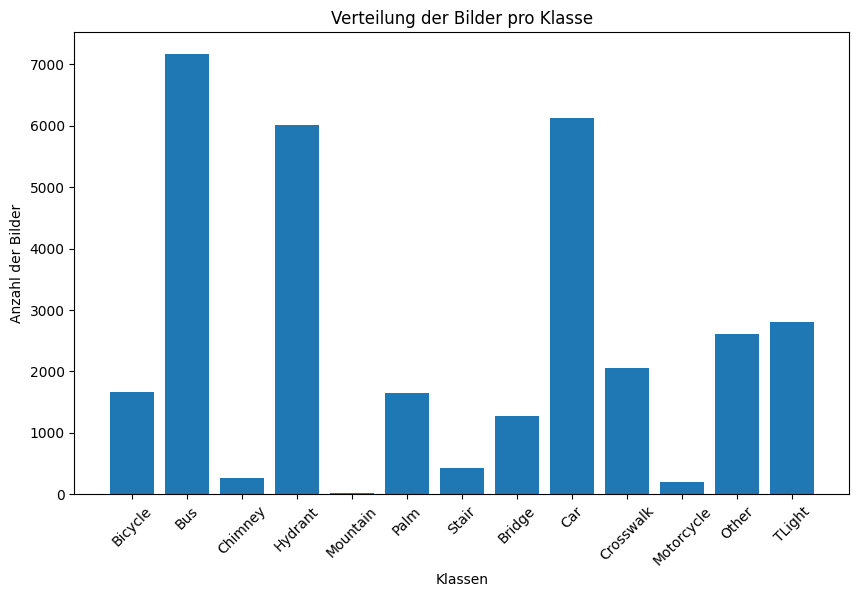

In [15]:
import matplotlib.pyplot as plt
# class_counts = dict.values()
class_counts = {folder: len([f for f in os.listdir(os.path.join(main_dir, folder)) if f.endswith('png') or f.endswith('jpg')]) for folder in folders}

# Balkendiagramm der Klassenverteilung
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Klassen')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Bilder pro Klasse')
plt.xticks(rotation=45)
plt.show()

### Dateiendungen prüfen
Die Verteilung der Bildformate (z.B. PNG, JPG) wurde untersucht, um sicherzustellen, dass alle Formate berücksichtigt werden. Eine dritte Kategorie für alle anderen Dateiendungen wurde erstellt.

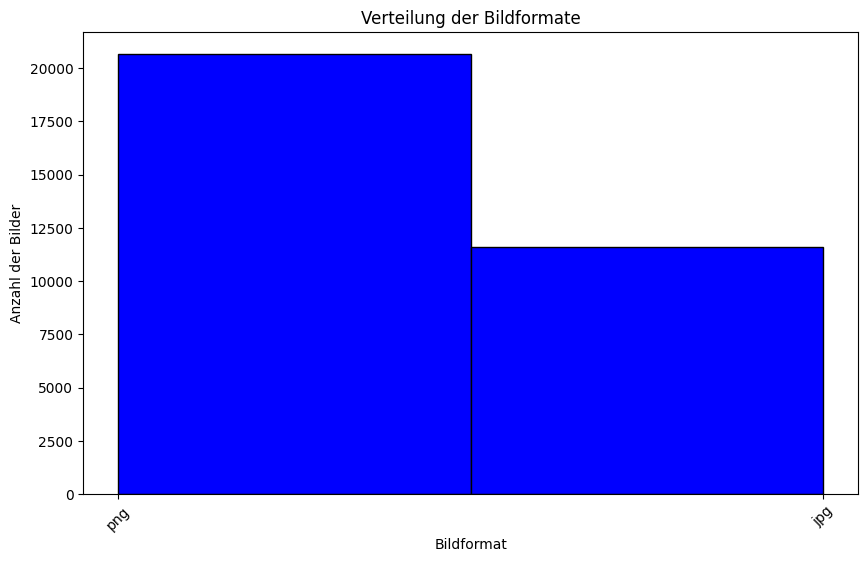

In [16]:
file_formats = []
other_formats = 0

for folder in folders:
    folder_path = os.path.join(main_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_extension = file.split('.')[-1].lower()
            if file_extension in ['png', 'jpg', 'jpeg']:
                file_formats.append(file_extension)
            else:
                other_formats += 1

# Füge die Anzahl anderer Formate zur Liste hinzu
file_formats.extend(['other'] * other_formats)

# Balkendiagramm der Bildformate
plt.figure(figsize=(10, 6))
plt.hist(file_formats, bins=len(set(file_formats)), color='blue', edgecolor='black')
plt.xlabel('Bildformat')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Bildformate')
plt.xticks(rotation=45)
plt.show()

### Bildgrößen und Auflösungen
Die Verteilung der Bildbreiten und -höhen wurde visualisiert, um ein besseres Verständnis der Größenverteilung innerhalb des Datensatzes zu erlangen. Diese Information ist entscheidend für die Entscheidung über die Bildskalierung und -normalisierung in späteren Schritten der Datenvorverarbeitung.

In [ ]:
from PIL import Image

image_sizes = []
for folder in folders:
 folder_path = os.path.join(main_dir, folder)
 if os.path.isdir(folder_path):
  for file in os.listdir(folder_path):
      if file.endswith('png') or file.endswith('jpg'):
          img_path = os.path.join(folder_path, file)
          with Image.open(img_path) as img:
           if img.size not in image_sizes:
            image_sizes.append(img.size)

logger.info(f"Einzigartige Bildgrößen: {image_sizes}")

### Plotte ein Bild aus jedem Ordner
Ein visueller Eindruck des Datensatzes wurde durch das Anzeigen von Beispielbildern aus jedem Ordner gewonnen.

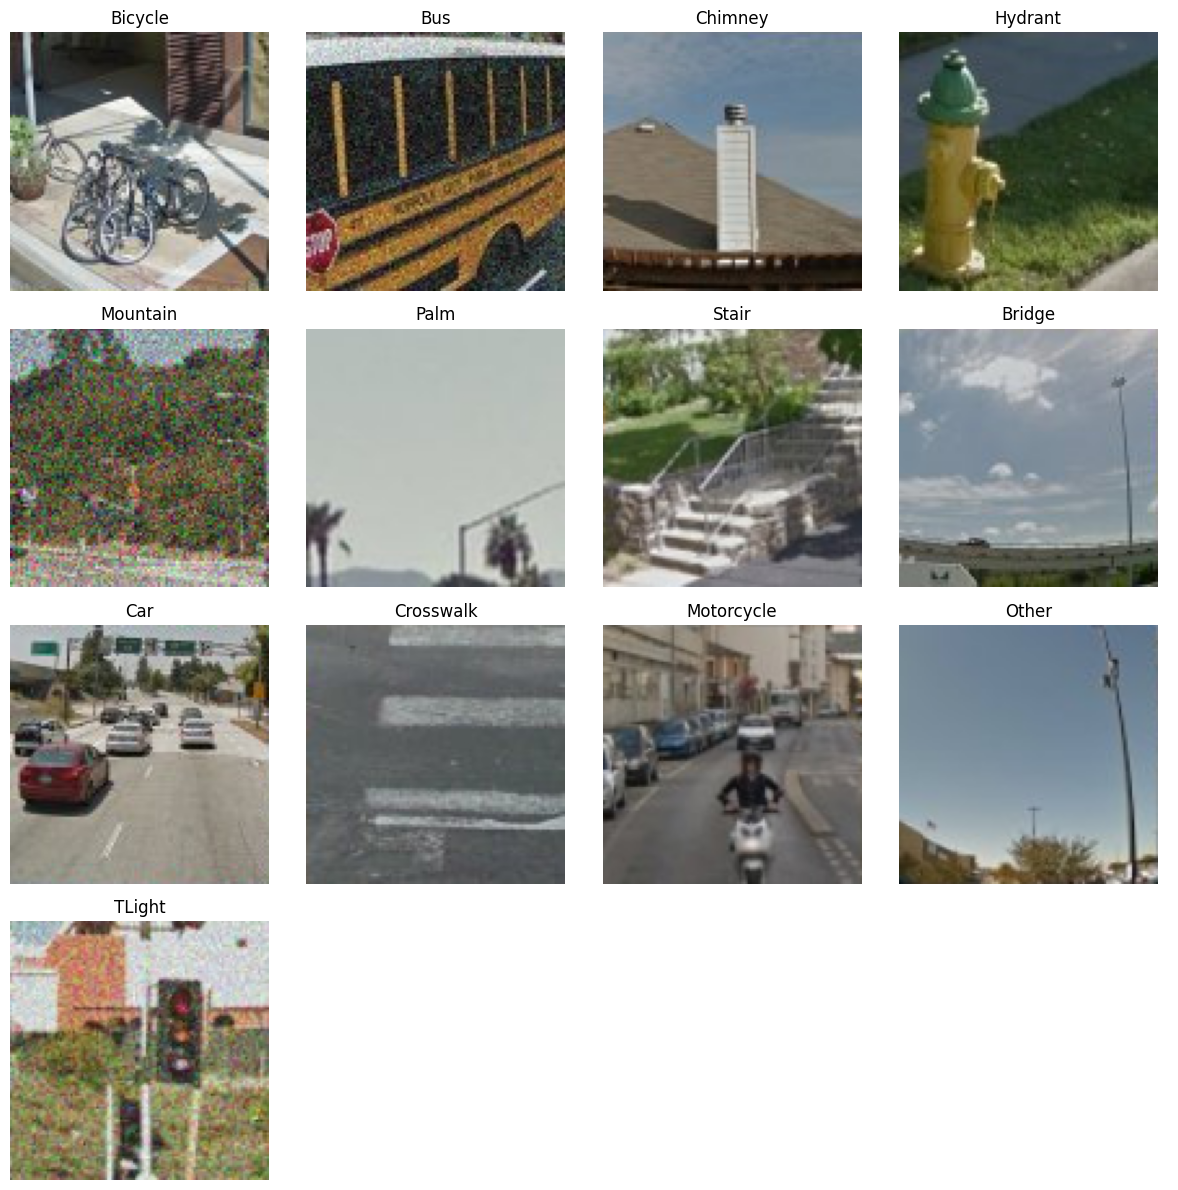

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

main_dir = '../Google-Recaptcha-V2-Images/'

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

count = 0

for folder in folders:
    if count >= 16:
        break
    folder_path = os.path.join(main_dir, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        img_files = [f for f in files if f.endswith('png') or f.endswith('jpg')]

        if img_files:
            img_path = os.path.join(folder_path, img_files[1])
            img = mpimg.imread(img_path)

            row = count // 4
            col = count % 4

            axes[row, col].imshow(img)
            axes[row, col].set_title(folder)
            axes[row, col].axis('off')
            count += 1


for i in range(count, 16):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Zusammenfassung und Schlussfolgerungen der EDA

**Erkenntnisse**

Verteilung der Bildanzahlen: Die meisten Bilder sind in der Kategorie „Car“ vorhanden, was möglicherweise darauf hinweist, dass diese Kategorie am häufigsten vorkommt oder für die reCAPTCHA-Herausforderungen am wichtigsten ist.

Kategorien mit wenig Bildern: Kategorien wie „Mountain“ haben nur sehr wenige Bilder, was zu einer Ungleichheit in der Datenmenge führen kann.

Mögliche Anomalien: Kategorien wie „Mountain“ könnten als mögliche Anomalien betrachtet werden, die weitere Aufmerksamkeit erfordern.

**Empfehlungen**

Datenbalance: Eine Datenbalancierung könnte notwendig sein, um sicherzustellen, dass das Modell gleichmäßig über alle Kategorien trainiert wird.

Weitere Datensammlung: Für Kategorien mit wenigen Bildern könnten zusätzliche Daten gesammelt werden, um die Modellleistung zu verbessern.

## 3. Erstellen eines maschinellen Datensatzes

Das Ziel dieses Abschnitts ist die Erzeugung eines Datensatzes, für die maschinelle Verarbeitung geeignet ist

1. Resizing (Veränderung der Bildgröße)
2. Resampling (Veränderung der Auflösung)
3. Encoding

4. Create Label

In [10]:
%cd /content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images/
main_dir = '/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images/'

/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images


In [40]:
import tensorflow.keras as keras
data = keras.utils.image_dataset_from_directory(
    os.getcwd(),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(120, 120),
    shuffle=False,
    seed=42,
    validation_split=.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 32265 files belonging to 13 classes.
Using 25812 files for training.
Using 6453 files for validation.


In [41]:
print(data)

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 13), dtype=tf.float32, name=None))>, <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 13), dtype=tf.float32, name=None))>]


In [45]:
for element in data[0]:
  print(element[1])

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 

KeyboardInterrupt: 

In [19]:
categories = []

# Iterate over the directories in the current main dir
for category_dir in os.listdir(os.getcwd()):
    # Append the file path to the list
    if os.path.isdir(category_dir) and category_dir != '.git':  # Ensure it's a file and not a directory
        categories.append(category_dir)

print(categories)

['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Other', 'Palm', 'Stair', 'TLight', '.ipynb_checkpoints']


In [20]:
files = {}
for category in categories:
  files[category] = []
  for file_path in os.listdir(main_dir + category):
    files[category].append(file_path)

files[categories[0]][:5]

['Bicycle$51594c9020ba0e12d6a99de2d3bccf24.png',
 'Bicycle$51c0b8344d4a3f795a7a4f98bb1ae3de.png',
 'Bicycle$51f75ee96448303d5ee80d1b5a98c725.png',
 'Bicycle$51f9627fbba37f6a0d53ec168487a195.png',
 'Bicycle$51fbbe42399989ebe95fc01163972977.png']

In [35]:
import PIL.Image


rgba_image = PIL.Image.open('/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images/Bridge/Bridge$00c8fb02ed155a864575f69c4130359a.png')
input_arr = img_to_array(rgba_image)
logger.info(input_arr.shape)
rgb_image = rgba_image.convert('RGB')
input_arr = img_to_array(rgb_image)
logger.info(input_arr.shape)

2024-08-24 08:06:25 - INFO - (120, 120, 4)
INFO:__main__:(120, 120, 4)
2024-08-24 08:06:25 - INFO - (120, 120, 3)
INFO:__main__:(120, 120, 3)


In [29]:
import numpy as np
from PIL import Image
rgba_image

s = []

for category in files.keys():
  for image in [files[category]][0]:
    # Load an image using PIL
    path = main_dir + category +'/'+ image

    image = load_img(path)
    input_arr = img_to_array(image)
    # if input_arr.shape[]
    # rgba_image = Image.open(path)
    # rgb_image = rgba_image.convert('RGB')
    if input_arr.shape not in s:
      print(input_arr.shape)
      s.append(input_arr.shape)

  logger.info(f'processed category {category}')
#   break
# input_arr = np.array(s)
# logger.info(f"s {s}")

(120, 120, 3)
(100, 100, 3)


2024-08-24 07:59:57 - INFO - processed category Bicycle
INFO:__main__:processed category Bicycle


KeyboardInterrupt: 

In [43]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.14
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.19.0.32.16
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread              

In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9747549869741137135
xla_global_id: -1
]
